In [2]:
import pandas as pd
import numpy as np

import sys
import glob


import soundfile as sf
import librosa
import librosa.display


from function import * 
from IPython.display import Audio
from pydub import AudioSegment

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) 

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result

def get_features(path):  
    data, sample_rate = librosa.load(path, SAMPLE_RATE)
    result = extract_features(data)
    result = np.array(result)
        
    return result

## Wild data (mine)

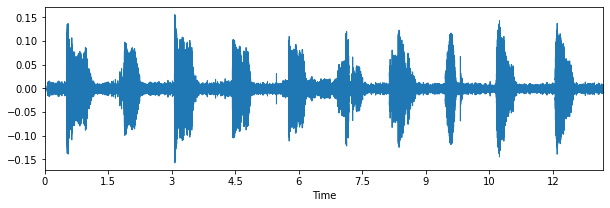

In [4]:
path = 'wild_data/wild_audio_1.m4a'
#path = 'wild_data_2.m4a'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate)
Audio(path)

In [20]:
SAMPLE_RATE = sampling_rate
SAMPLE_CHANNELS = 1
SAMPLE_WIDTH = 2

FRAME_SIZE = int(SAMPLE_RATE * (1500 / 1000.0))

In [29]:
data = np.concatenate((data, np.zeros(FRAME_SIZE - (len(data) % FRAME_SIZE))))
frames = np.array(np.split(data, len(data) / FRAME_SIZE))
for i, frame in enumerate(frames):
    sf.write('wild_data/wild_audio_1_frame_{}.wav'.format(i), frame, samplerate =sampling_rate, format='wav')


In [32]:
files = glob.glob('./wild_data/*.wav', recursive=True)

In [40]:
duration = 3000
for ind, file in enumerate(files): 
    song = AudioSegment.from_wav(file)  
    name = file[12:]
    allign = duration - len(song)
    silence_segment = AudioSegment.silent(duration=allign) 
    final_song = song + silence_segment

    final_song.export('./wild_data/{}'.format(name), format="wav")
    

In [43]:
Audio('wild_data/wild_audio_1_frame_0.wav')

In [51]:
%%time
X, Y = [], []
for ind, path in enumerate(files):
    name = path[12:]
    feature = get_features(path) 
    X.append(feature)  
    Y.append(path)
    
    

CPU times: user 692 ms, sys: 322 ms, total: 1.01 s
Wall time: 306 ms


In [54]:
Features = pd.DataFrame(X)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.021593,0.253924,0.256349,0.255075,0.263348,0.323253,0.329568,0.306661,0.274916,0.254069,...,0.000011,0.000008,0.000006,0.000002,0.000002,0.000001,0.000001,7.935148e-07,3.837445e-07,2.508922e-08
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,0.028681,0.386927,0.382031,0.338864,0.340171,0.363612,0.383151,0.389947,0.354623,0.334258,...,0.000014,0.000010,0.000007,0.000010,0.000008,0.000004,0.000002,1.443026e-06,6.267201e-07,6.770858e-08
4,0.021030,0.342397,0.331796,0.341744,0.349476,0.405371,0.424324,0.388615,0.366580,0.358942,...,0.000007,0.000007,0.000008,0.000008,0.000006,0.000004,0.000001,4.425739e-07,2.551493e-07,1.651005e-08


In [55]:
Features.shape

(12, 162)

In [56]:
Features['labels'] = Y
Features.to_csv('wild_features.csv', index=False)

## LibriSpeech + Speech

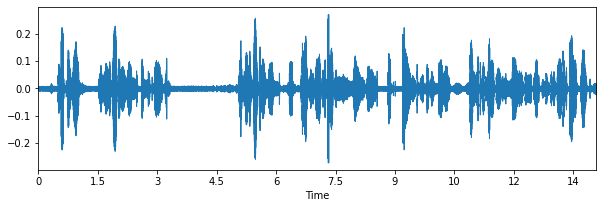

In [21]:
path = '../VAD/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac'
#path = 'wild_data_2.m4a'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate)
Audio(path)

In [22]:
data = np.concatenate((data, np.zeros(FRAME_SIZE - (len(data) % FRAME_SIZE))))
frames = np.array(np.split(data, len(data) / FRAME_SIZE))
for i, frame in enumerate(frames):
    sf.write('wild_data/libri_audio_1_frame_{}.wav'.format(i), frame, samplerate =sampling_rate, format='wav')


In [24]:
Audio('wild_data/libri_audio_1_frame_0.wav')

In [9]:
files = glob.glob('../VAD/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac', recursive=True)

In [32]:
libri_audio = AudioSegment.from_wav('wild_data/libri_audio_1_frame_0.wav')  
mnist = AudioSegment.from_wav('audio_data_raw/0_label_1.wav')  

final_song = libri_audio + mnist

final_song.export('./wild_data/libri+mnist.wav', format="wav")

<_io.BufferedRandom name='./wild_data/libri+mnist.wav'>

In [33]:
Audio('wild_data/libri+mnist.wav')

In [36]:
X = get_features('wild_data/libri+mnist.wav') 

In [39]:
Features.to_csv('mnist+libri_features.csv', index=False)

## Libri Speech

In [40]:
X = get_features('wild_data/libri_audio_1_frame_0.wav') 

In [41]:
Features.to_csv('libri_features.csv', index=False)